<a href="https://colab.research.google.com/github/jenslaufer/Data2Decision/blob/master/notebooks/Fallzahlen_Analyse_unpolished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Setting up libaries (pandas, matplotlib, seaborn, numpy and scipy)
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf

#Importing most recent data from JHU
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
data_confirmed = pd.read_csv(url_confirmed)
data_dead = pd.read_csv(url_deaths)

In [0]:
#Cleaning the data from JHU
dcc = data_confirmed.rename(columns = {"Province/State": "state", "Country/Region": "country"}) #renaming some columns
dcc = dcc.groupby("country").sum() #summing up values of countries that have their values distributed over states e.g. US, France
dcc = dcc.iloc[:,2:].T.rename(columns = {"Korea, South": "South Korea"}) #transversing the dataframe and rename one column
dcc['day'] = range(0,len(dcc)) #create a column for the day count
dcc['dates'] = dcc.index       #copy the index(dates) to a new column
dcc['datetime'] = pd.to_datetime(dcc['dates'])
dcc = dcc.set_index('datetime')     #make the day count the new index

ddc = data_dead.rename(columns = {"Province/State": "state", "Country/Region": "country"})
ddc = ddc.groupby("country").sum()
ddc = ddc.iloc[:,2:].T.rename(columns = {"Korea, South": "South Korea"})
ddc['day'] = range(0,len(ddc))
ddc['dates'] = ddc.index
ddc['datetime'] = pd.to_datetime(ddc['dates'])
ddc = ddc.set_index('datetime')     

#day when exponential growth starts for confirmed cases / death cases
expini_data =[['Germany',33,'2/24/20',47,'3/9/20'],
         ['Spain',33,'2/24/20',41,'3/3/20'],
         ['France',33,'2/24/20',34,'2/24/20'],
         ['Italy',29,'2/20/20',30,'2/21/20'],
         ['South Korea',24,'2/15/20',28,'2/19/20'],
         ['US',32,'2/23/20',38,'2/29/20']]
expini = pd.DataFrame(expini_data,columns =['country','confirmed_day','confirmed_date','death_day','death_date']).set_index('country')
expini['confirmed_date'] = pd.to_datetime(expini['confirmed_date'])
expini['death_date'] = pd.to_datetime(expini['death_date'])
#Output confirmed cases DataFrame
#dcc.loc[:,['dates','Germany','Italy','Spain','France','South Korea','US']]

In [0]:
ddc

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,...,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,day,dates
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1/22/20
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1/23/20
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1/24/20
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1/25/20
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1/26/20
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1/27/20
2020-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1/28/20
2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1/29/20
2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,171,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1/30/20


In [0]:
expini

,confirmed_day,confirmed_date,death_day,death_date
country,,,,
Germany,33,2020-02-24,47,2020-03-09
Spain,33,2020-02-24,41,2020-03-03
France,33,2020-02-24,34,2020-02-24
Italy,29,2020-02-20,30,2020-02-21
South Korea,24,2020-02-15,28,2020-02-19
US,32,2020-02-23,38,2020-02-29


In [0]:
#Defining multiple models to describe the growth behavior
def exp_mod(var,day_0,cases_at_day_0,t_double): #Doubling the number of cases every t_double days
    """Returns an exponential function which is 
    scaled by caess_at_day_0
    shifted by day_0
    and has a growth factor of log(2)/t_double,
    where t_double is the time in days in which the function doubles
    """
    return cases_at_day_0*np.exp(np.log(2)*(var-day_0)/t_double)
def lin_mod(var,day_0,cases_at_day_0,t_double): #Linear equivalent of exp_mod in log-space
    """Equivalent to log(exp_mod)"""
    return np.log(cases_at_day_0)+np.log(2)*(var-day_0)/t_double
def logistic_mod_new(var,turning_day,turning_cases,t_double): #
    """Returns the logistic function with
    shifted by turning_day
    a maximum value of 2*turning_cases for var->infty
    and a incliniation at the turning point of slope*turning_cases/2
    """
    slope=np.log(2)/t_double
    return 2*turning_cases/(1+np.exp(-slope*(var-turning_day)))
def lin_log_mod(var,turning_day,turning_cases,t_double):
    """Equivalent to log(lin_mod_new)"""
    slope=np.log(2)/t_double
    return np.log(2*turning_cases/(1+np.exp(-slope*(var-turning_day))))

def dexp_mod(var,day_0,cases_at_day_0,t_double):
    """Returns the derivative of exp_mod"""
    return np.log(2)/t_double*cases_at_day_0*np.exp(np.log(2)*(var-day_0)/t_double)
def dlogistic_mod_new(var,turning_day,turning_cases,t_double):
    """Returns the derivative of logistic_mod"""
    slope=np.log(2)/t_double
    return 2*turning_cases*slope*np.exp(-slope*(var-turning_day))/(1+np.exp(-slope*(var-turning_day)))**2

In [0]:
def doublingtorate(t_doubling):
    return 2**(1./t_doubling)-1

def format_logi_vals(logi_best_vals_cc):
    string_formatted  = \
    f'Logistic model:\n\
    rate - doubling every: {logi_best_vals_cc[2]:.2f} days\n\
    .... - increase by {(doublingtorate(logi_best_vals_cc[2])*100):.2f}% each day\n\
    Total cases: {2*logi_best_vals_cc[1]:.2f} \n\
    Turning Day: {logi_best_vals_cc[0]:.2f}\n'
    return string_formatted

def format_exp_vals(exp_best_vals_cc):
    string_formatted  = \
    f'Exponential model:\n\
    rate - doubling every: {exp_best_vals_cc[2]:.2f} days\n\
    .... - increase by {doublingtorate(logi_best_vals_cc[2])*100:.2f}% each day\n'
    return string_formatted

In [0]:
dcc.loc[start_date_cc:,'day']

NameError: ignored

Confirmed cases (green):
Logistic model:
    rate - doubling every: 2.16 days
    .... - increase by 37.92% each day
    Total cases: 8375.02 
    Turning Day: 39.86

Confirmed cases for last 4 days (red):
Exponential model:
    rate - doubling every: 47.91 days
    .... - increase by 37.92% each day

Dead cases (green):
Logistic model:
    rate - doubling every: 4.15 days
    .... - increase by 18.19% each day
    Total cases: 108.67 
    Turning Day: 47.67

Dead cases for last 4 days (red):
Exponential model:
    rate - doubling every: 11.27 days
    .... - increase by 37.92% each day



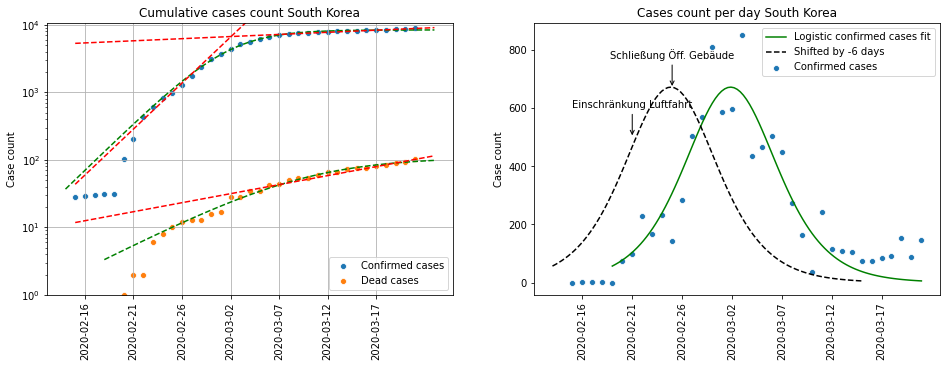

In [0]:
#General approach to fitting models to data

#Defining parameters
country = 'South Korea' #Country
country = 'France'
start_day_cc = expini.loc[country,'confirmed_day'] #Start day of exponentail growth in confirmed cases
start_date_cc = expini.loc[country,'confirmed_date']
start_cc = dcc.loc[expini.loc[country,'confirmed_date'],country] #Number of confirmed cases at start of exponentail growth
start_day_dc = expini.loc[country,'death_day'] #Start day of exponentail growth in death cases
start_date_dc = expini.loc[country,'death_date']
start_dc = ddc.loc[expini.loc[country,'death_date'],country] #Number of death cases at start of exponentail growth
latest_date = dcc.last_valid_index()
latest_day = dcc.loc[dcc.last_valid_index(),'day'] #Most recent datapoint(day)
latest_cc = dcc.loc[dcc.last_valid_index(),country] #Most recent datapoint(number_confirmed_cases)
latest_dc = ddc.loc[ddc.last_valid_index(),country] #Most recent datapoint(number_death_cases)

#Plotting details
plt.figure(figsize=(16,5))
plt.subplot(121)

#Setting range of days and parameters for fitting confirmed cases
init_vals = [latest_day,latest_cc,2] #Using the most recent datapoint and a 2-day doubling rate as starting values
low_bound = [start_day_cc,start_cc,0.1] #Using the first datapoint and a 0.2-day doubling time as lower bound
upp_bound = [1E3,8E9,1000]

#Logistic fitting for confirmed cases
x = np.linspace(start_day_cc, latest_day, latest_day-start_day_cc+1)
y = dcc.loc[start_date_cc:latest_date,country]
try:
    logi_best_vals_cc, covar = curve_fit(logistic_mod_new,x,y,p0=init_vals, bounds=(low_bound,upp_bound))
    print('Confirmed cases (green):')
    print(format_logi_vals(logi_best_vals_cc))
    x = np.linspace(start_day_cc-1, latest_day+2, 100)
    plt.plot(x,logistic_mod_new(x,*logi_best_vals_cc), 'g--')
except:
    exp_best_vals_cc, covar = curve_fit(exp_mod,x,y,p0=init_vals, bounds=(low_bound,upp_bound))
    print('Logistic model not possible: Exponential model of confirmed cases (green):')
    print(format_exp_vals(exp_best_vals_cc))

#Exponential model for confirmed cases of last 4 days    
x = np.linspace(latest_day-3, latest_day, 4)
#y = np.log(dcc.loc[latest_day-3:latest_day,country])
y = np.log(dcc.last('4d')[country])
exp_best_vals_cc, covar = curve_fit(lin_mod,x,y,p0=logi_best_vals_cc, bounds=(low_bound,upp_bound))
print('Confirmed cases for last 4 days (red):')
print(format_exp_vals(exp_best_vals_cc))
x = np.linspace(start_day_cc, latest_day+2, 100)
plt.plot(x,exp_mod(x,*exp_best_vals_cc), 'r--')

#South Korea Start
x = np.linspace(start_day_cc, latest_day+2, 100)
plt.plot(x,exp_mod(x,34,1E3,2.21), 'r--')

#Actual Data of confirmed cases
sns.scatterplot(x=dcc.loc[start_date_cc:,'day'], y=dcc.loc[start_date_cc:,country], label='Confirmed cases')

#Setting range of days and parameters for fitting dead cases
init_vals = [latest_day,latest_cc,2] #Using the most recent datapoint and a 2-day doubling rate as starting values
low_bound = [start_day_cc,start_cc,0.1] #Using the first datapoint and a 0.2-day doubling time as lower bound
upp_bound = [1E3,8E9,1000]

#Logistic fitting for dead cases
x = np.linspace(start_day_dc, latest_day, latest_day-start_day_dc+1)
y = ddc.loc[start_date_dc:latest_date,country]
try:
    logi_best_vals, covar = curve_fit(logistic_mod_new,x,y,p0=init_vals, bounds=(low_bound,upp_bound))
    print('Dead cases (green):')
    print(format_logi_vals(logi_best_vals))
    x = np.linspace(start_day_dc-1, latest_day+2, 100)
    plt.plot(x,logistic_mod_new(x,*logi_best_vals), 'g--')
except:
    exp_best_vals, covar = curve_fit(exp_mod,x,y,p0=init_vals, bounds=(low_bound,upp_bound))
    print('Logistic model not possible: Exponential model of dead cases (green):')
    print(format_exp_vals(exp_best_vals))

#Exponential model for dead cases of last 4 days    
x = np.linspace(latest_day-3, latest_day, 4)
y = np.log(ddc.last('4d')[country])
exp_best_vals, covar = curve_fit(lin_mod,x,y,p0=logi_best_vals, bounds=(low_bound,upp_bound))
print('Dead cases for last 4 days (red):')
print(format_exp_vals(exp_best_vals))
x = np.linspace(start_day_cc, latest_day+2, 100)
plt.plot(x,exp_mod(x,*exp_best_vals), 'r--')

#Actual Data of dead cases
sns.scatterplot(x=ddc.loc[start_date_dc:,'day'], y=ddc[country].loc[start_date_dc:], label='Dead cases')

#Plotspecifications           
plt.yscale('log')
plt.ylim(bottom=1, top=1.2*latest_cc) #top=2.2*best_vals[1]
plt.grid()
plt.title('Cumulative cases count ' + country)
plt.ylabel('Case count')
#plt.xlabel('Days since 22.01.20')

# xlabels
xtick_pos = range(25,60,5)
plt.xticks(xtick_pos, [dcc.loc[dcc['day']==i].index.format('{%M-%d}')[1] for i in xtick_pos], rotation=90)
plt.xlabel(' ')

plt.subplot(122)
x = np.linspace(start_day_dc, latest_day, 100)
plt.plot(x,dlogistic_mod_new(x,*logi_best_vals_cc), 'g-', label='Logistic confirmed cases fit')
plt.plot(x-6,dlogistic_mod_new(x,*logi_best_vals_cc), 'k--', label='Shifted by -6 days')
sns.scatterplot(x=dcc.loc[start_date_cc:,'day'], y=dcc[country].diff().loc[start_date_cc:], label='Confirmed cases')
plt.title('Cases count per day ' + country)
plt.ylabel('Case count')
#plt.xlabel('Days since 22.01.20')
plt.xlabel(' ')

# xlabels
xtick_pos = range(25,60,5)
plt.xticks(xtick_pos, [dcc.loc[dcc['day']==i].index.format('{%M-%d}')[1] for i in xtick_pos], rotation=90)
plt.axis()

# annotation
ax = plt.gca()
ax.annotate('Einschränkung Luftfahrt', xy=(30,500), xytext=(30,500+100),
            arrowprops={'arrowstyle': '->'}, ha='center')
ax.annotate('Schließung Öff. Gebäude', xy=(34,670), xytext=(34,670+100),
            arrowprops={'arrowstyle': '->'}, ha='center')
plt.show()

In [0]:
[dcc.loc[dcc['day']==i].index.format('%Y-%M-%d')[1] for i in xtick_pos]

['2020-02-16',
 '2020-02-21',
 '2020-02-26',
 '2020-03-02',
 '2020-03-07',
 '2020-03-12',
 '2020-03-17']

In [0]:
str(dcc.index)

"DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',\n               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',\n               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',\n               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',\n               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',\n               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',\n               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',\n               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',\n               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',\n               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',\n               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',\n               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',\n               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',\n               '2020-03-14', '2020-03-15', '2020-03-16', '2020-

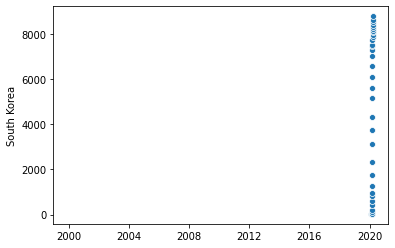

In [0]:
sns.scatterplot(dcc[start_date_cc:].index.values,dcc.loc[start_date_cc:,country])

In [0]:
dcc.loc[(x_now-avg_range <= dcc.day) &  (dcc.day <= x_now+avg_range)].index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21'],
              dtype='datetime64[ns]', name='datetime', freq=None)

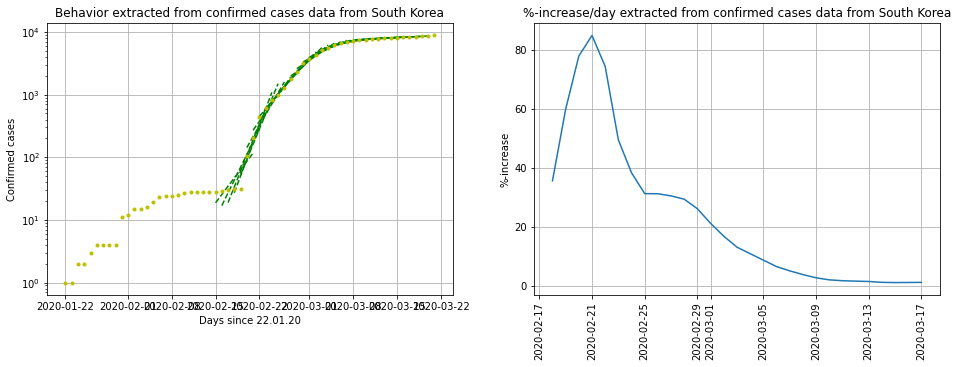

In [0]:
#Extracting the doubling-time from the exponential increase in the confirmed cases
plt.figure(figsize=(16,5))
plt.subplot(121)
double_times = []
increase_perc = []
avg_range = 3              #number of days before and after the considered day used in averaging the doubling time of the exponential growth
for x_now in range(start_day_cc+avg_range,latest_day-avg_range,1):
    x = np.linspace(x_now-avg_range, x_now+avg_range, 2*avg_range+1)
    y = np.log(dcc[country].loc[(x_now-avg_range <= dcc.day) &  (dcc.day <= x_now+avg_range)])
    init_vals = [x_now-avg_range,dcc[country].loc[dcc.day == (x_now-avg_range)],2.25]
    best_vals, covar = curve_fit(lin_mod,x,y,p0=init_vals, bounds=([0,1,0],[100,80E6,1000]))
    double_times.append(best_vals[2])
    increase_perc.append(doublingtorate(best_vals[2])*100)
    plt.plot(dcc.loc[(x_now-avg_range <= dcc.day) &  (dcc.day <= x_now+avg_range)].index,exp_mod(x,*best_vals), 'g--')
plt.title('Behavior extracted from confirmed cases data from ' + country)
plt.ylabel('Confirmed cases')
plt.xlabel('Days since 22.01.20')
plt.yscale('log')
plt.grid()
#plt.xlim(left=start_day_cc)
plt.plot(dcc.index, dcc[country], 'y.')   

plt.subplot(122)
plt.title('%-increase/day extracted from confirmed cases data from ' + country)
plt.ylabel('%-increase')
plt.xlabel('Days since 22.01.20')
plt.xlabel('')
plt.grid()
#plt.yscale('log')
#plt.ylim(bottom=1, top=100)
#plt.xlim(left=start_day_cc, right=latest_day)
# plt.plot(range(start_day_cc+avg_range,latest_day-avg_range,1),increase_perc)
plt.plot(dcc.loc[(start_day_cc+avg_range<=dcc.day) & (dcc.day<(latest_day-avg_range))].index, increase_perc)
plt.xticks(rotation=90)
plt.show()    

#plt.plot(range(start_day_cc+avg_range+1,latest_day-avg_range,1),np.divide(double_times[1:],double_times[:-1]))


In [0]:
len(dcc.loc[(start_day_cc+avg_range<=dcc.day) & (dcc.day<(latest_day-avg_range))].index)

29

In [0]:
increase_perc

[35.68540231315118,
 59.96842050857427,
 78.06129219941012,
 85.04512356315519,
 74.5361110860599,
 49.57104920951354,
 38.38888689171724,
 31.2995532000232,
 31.276824306719075,
 30.531843503457857,
 29.419446087040146,
 26.163010732534797,
 21.21416816959565,
 16.843037773408543,
 13.121623278128936,
 10.913035123667614,
 8.717374229638676,
 6.5255086119661465,
 5.072492125015304,
 3.8120136293378293,
 2.717655108944683,
 2.012272937637749,
 1.7182491082564866,
 1.5767497764717087,
 1.4574684995038556,
 1.166815954820155,
 1.0866486135404196,
 1.1171730218165532,
 1.1516601329917941]